In [1]:
import numpy as np
from data_loader import load_cifar10_data
from model import NeuralNetwork
from trainer import Trainer
import matplotlib.pyplot as plt

# 加载数据（保持与现有代码一致）
X_train_full, y_train_full, X_test, y_test = load_cifar10_data('cifar-10-batches-py')
val_size = 5000
X_val = X_train_full[:val_size]
y_val = y_train_full[:val_size]
X_train = X_train_full[val_size:]
y_train = y_train_full[val_size:]

# 定义超参数网格
hidden_sizes = [128, 256, 512]
learning_rates = [0.01, 0.001, 0.0001]
reg_lambdas = [0.0001, 0.001, 0.01]

best_val_acc = 0
best_params = None
results = []

# 参数查找
for hidden_size in hidden_sizes:
    for lr in learning_rates:
        for reg in reg_lambdas:
            print(f"\nTraining with hidden_size={hidden_size}, lr={lr}, reg={reg}")
            model = NeuralNetwork(3072, hidden_size, 10, activation='relu', reg_lambda=reg)
            trainer = Trainer(model, learning_rate=lr, epochs=10)  # 使用少量 epoch 快速实验
            trainer.train(X_train, y_train, X_val, y_val)
            val_acc = trainer.val_accs[-1]  # 最后一个 epoch 的验证准确率
            results.append((hidden_size, lr, reg, val_acc))
            print(f"Validation Accuracy: {val_acc:.4f}")
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_params = (hidden_size, lr, reg)

print(f"\nBest parameters: hidden_size={best_params[0]}, lr={best_params[1]}, reg={best_params[2]} with Val Acc: {best_val_acc:.4f}")

c:\Users\lenovo\miniconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\lenovo\miniconda\lib\site-packages\numpy\.libs\libopenblas.xwydx2ikjw2nmtwsfyngfuwkqu3lytcz.gfortran-win_amd64.dll
c:\Users\lenovo\miniconda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"



Training with hidden_size=128, lr=0.01, reg=0.0001
Epoch 1/10, Loss: 312.9682, Val Acc: 0.3048
Epoch 2/10, Loss: 312.2380, Val Acc: 0.3184
Epoch 3/10, Loss: 313.1360, Val Acc: 0.3284
Epoch 4/10, Loss: 312.3149, Val Acc: 0.3590
Epoch 5/10, Loss: 312.4479, Val Acc: 0.3756
Epoch 6/10, Loss: 312.9100, Val Acc: 0.3758
Epoch 7/10, Loss: 312.6745, Val Acc: 0.3856
Epoch 8/10, Loss: 312.4742, Val Acc: 0.4070
Epoch 9/10, Loss: 312.5654, Val Acc: 0.4086
Epoch 10/10, Loss: 311.9275, Val Acc: 0.4244
Validation Accuracy: 0.4244

Training with hidden_size=128, lr=0.01, reg=0.001
Epoch 1/10, Loss: 312.9339, Val Acc: 0.2976
Epoch 2/10, Loss: 312.8755, Val Acc: 0.3290
Epoch 3/10, Loss: 312.7625, Val Acc: 0.3410
Epoch 4/10, Loss: 312.4295, Val Acc: 0.3596
Epoch 5/10, Loss: 312.4582, Val Acc: 0.3816
Epoch 6/10, Loss: 313.1338, Val Acc: 0.3550
Epoch 7/10, Loss: 312.3993, Val Acc: 0.4012
Epoch 8/10, Loss: 313.1160, Val Acc: 0.3786
Epoch 9/10, Loss: 312.1961, Val Acc: 0.3670
Epoch 10/10, Loss: 312.2611, Val

Epoch 1/50, Loss: 312.9051, Val Acc: 0.3020
Epoch 2/50, Loss: 312.7321, Val Acc: 0.3492
Epoch 3/50, Loss: 312.6687, Val Acc: 0.3826
Epoch 4/50, Loss: 312.5305, Val Acc: 0.3978
Epoch 5/50, Loss: 312.7423, Val Acc: 0.3052
Epoch 6/50, Loss: 313.0203, Val Acc: 0.3964
Epoch 7/50, Loss: 312.1766, Val Acc: 0.4174
Epoch 8/50, Loss: 312.4836, Val Acc: 0.4384
Epoch 9/50, Loss: 312.3834, Val Acc: 0.4400
Epoch 10/50, Loss: 312.1208, Val Acc: 0.4384
Epoch 11/50, Loss: 312.8051, Val Acc: 0.4196
Epoch 12/50, Loss: 312.5814, Val Acc: 0.4146
Epoch 13/50, Loss: 312.4784, Val Acc: 0.4032
Epoch 14/50, Loss: 312.0906, Val Acc: 0.4620
Epoch 15/50, Loss: 312.6936, Val Acc: 0.2814
Epoch 16/50, Loss: 311.7251, Val Acc: 0.4338
Epoch 17/50, Loss: 311.8809, Val Acc: 0.4512
Epoch 18/50, Loss: 312.2892, Val Acc: 0.4372
Epoch 19/50, Loss: 312.4589, Val Acc: 0.3964
Epoch 20/50, Loss: 311.8835, Val Acc: 0.4812
Epoch 21/50, Loss: 311.8365, Val Acc: 0.5118
Epoch 22/50, Loss: 312.3136, Val Acc: 0.5100
Epoch 23/50, Loss: 

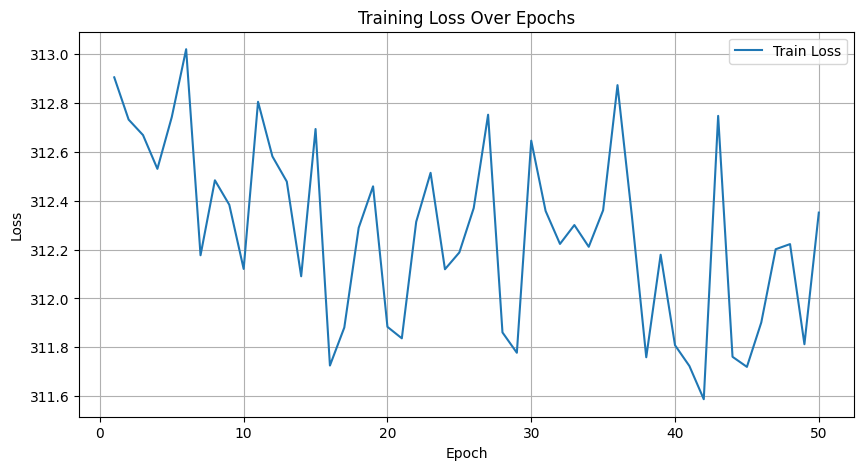

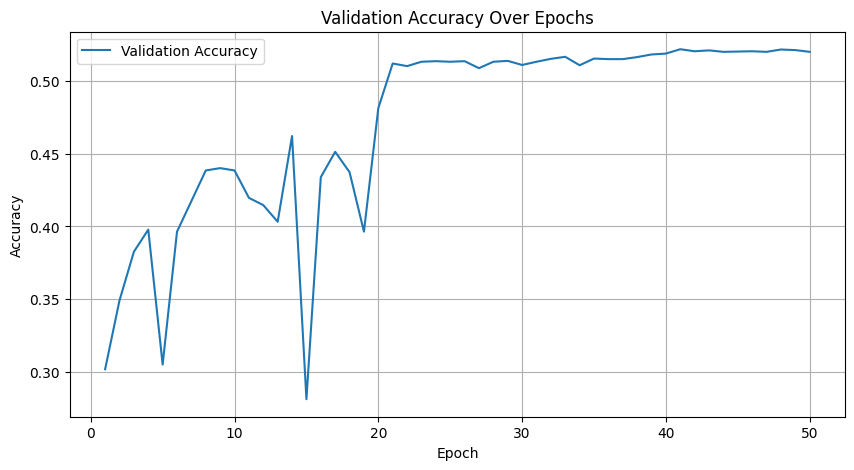

Test Accuracy with Best Parameters: 0.5128


In [ ]:
hidden_size, lr, reg = best_params

model = NeuralNetwork(3072, hidden_size, 10, activation='relu', reg_lambda=reg)
trainer = Trainer(model, learning_rate=lr, epochs=50)  # 使用更多 epoch 确保收敛
trainer.train(X_train, y_train, X_val, y_val)

# 绘制训练 loss 曲线
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(trainer.train_losses) + 1), trainer.train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# 绘制验证 accuracy 曲线
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(trainer.val_accs) + 1), trainer.val_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# 测试最佳模型
test_acc = trainer.evaluate(X_test, y_test)
print(f"Test Accuracy with Best Parameters: {test_acc:.4f}")

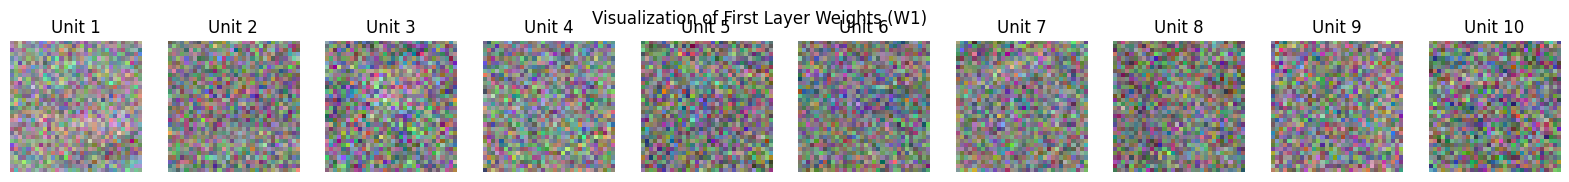

In [13]:
import numpy as np
from data_loader import load_cifar10_data
from model import NeuralNetwork
from trainer import Trainer
import matplotlib.pyplot as plt
trainer = Trainer(model, learning_rate=lr, epochs=50)
# 加载最佳模型并可视化 W1
trainer.load_model('best_model.npy')
W1 = trainer.model.W1  # 形状为 (hidden_size, 3072)

# 可视化前 10 个隐藏单元的权重（可根据 hidden_size 调整数量）
num_units = min(10, W1.shape[0])
plt.figure(figsize=(num_units * 2, 2))
for i in range(num_units):
    # 将权重重塑为 32x32x3 的图像
    img = W1[i].reshape(3, 32, 32).transpose(1, 2, 0)
    # 归一化到 [0, 1] 以便显示
    img = (img - img.min()) / (img.max() - img.min())
    plt.subplot(1, num_units, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Unit {i+1}')
plt.suptitle('Visualization of First Layer Weights (W1)')
plt.show()

Epoch 1/100, Loss: 312.7278, Val Acc: 0.2738
Epoch 2/100, Loss: 312.4344, Val Acc: 0.2630
Epoch 3/100, Loss: 312.3449, Val Acc: 0.3718
Epoch 4/100, Loss: 312.1473, Val Acc: 0.3252
Epoch 5/100, Loss: 312.6785, Val Acc: 0.2806
Epoch 6/100, Loss: 312.4220, Val Acc: 0.1036
Epoch 7/100, Loss: 312.4001, Val Acc: 0.3428
Epoch 8/100, Loss: 313.1056, Val Acc: 0.3458
Epoch 9/100, Loss: 312.9460, Val Acc: 0.2592
Epoch 10/100, Loss: 312.2135, Val Acc: 0.3992
Epoch 11/100, Loss: 312.5377, Val Acc: 0.3132
Epoch 12/100, Loss: 313.0823, Val Acc: 0.2380
Epoch 13/100, Loss: 312.3366, Val Acc: 0.1868
Epoch 14/100, Loss: 312.4268, Val Acc: 0.3122
Epoch 15/100, Loss: 312.5687, Val Acc: 0.2674
Epoch 16/100, Loss: 313.6372, Val Acc: 0.2706
Epoch 17/100, Loss: 312.1263, Val Acc: 0.3120
Epoch 18/100, Loss: 311.9942, Val Acc: 0.4026
Epoch 19/100, Loss: 311.8796, Val Acc: 0.3642
Epoch 20/100, Loss: 312.5479, Val Acc: 0.2742
Epoch 21/100, Loss: 311.7619, Val Acc: 0.5398
Epoch 22/100, Loss: 312.3994, Val Acc: 0.54

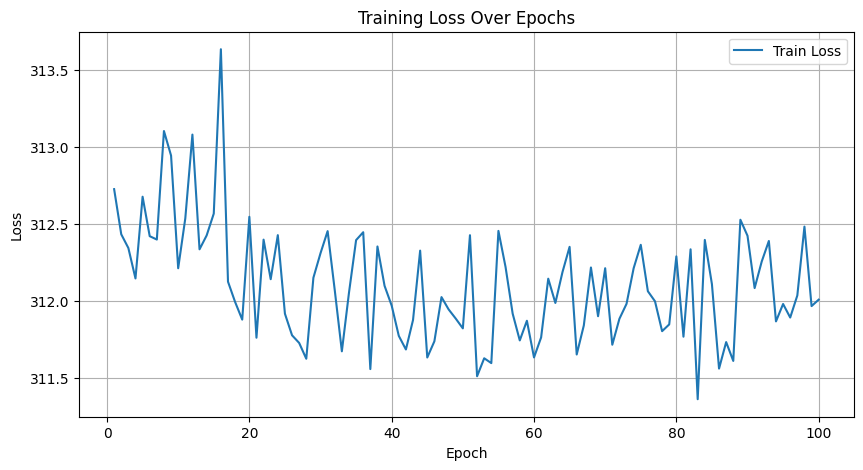

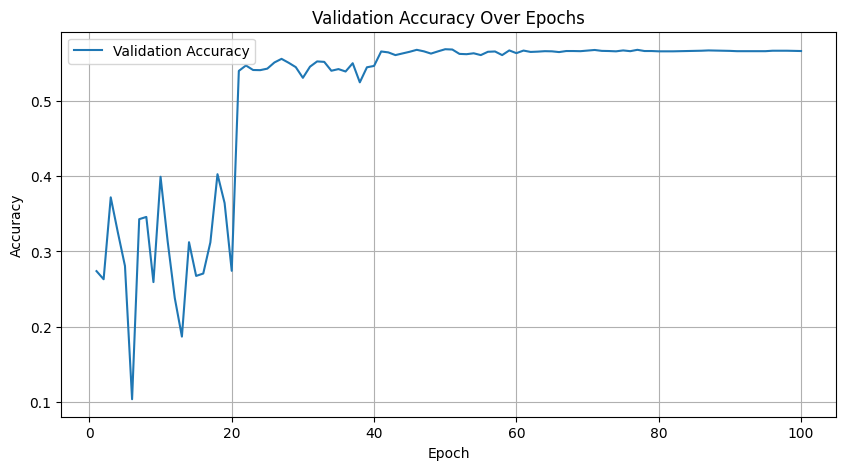

Test Accuracy with Best Parameters: 0.5561


In [5]:
# 加载数据（保持与现有代码一致）
X_train_full, y_train_full, X_test, y_test = load_cifar10_data('cifar-10-batches-py')
val_size = 5000
X_val = X_train_full[:val_size]
y_val = y_train_full[:val_size]
X_train = X_train_full[val_size:]
y_train = y_train_full[val_size:]

hidden_size=512
lr=0.1
reg=0.001
model = NeuralNetwork(3072, hidden_size, 10, activation='relu', reg_lambda=reg)
trainer = Trainer(model, learning_rate=lr, epochs=100)  # 使用更多 epoch 确保收敛
trainer.train(X_train, y_train, X_val, y_val)

# 绘制训练 loss 曲线
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(trainer.train_losses) + 1), trainer.train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# 绘制验证 accuracy 曲线
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(trainer.val_accs) + 1), trainer.val_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# 测试最佳模型
test_acc = trainer.evaluate(X_test, y_test)
print(f"Test Accuracy with Best Parameters: {test_acc:.4f}")

hidden_size=512 lr=0.1 reg=0.001 在epoch为50，可视化的参数矩阵

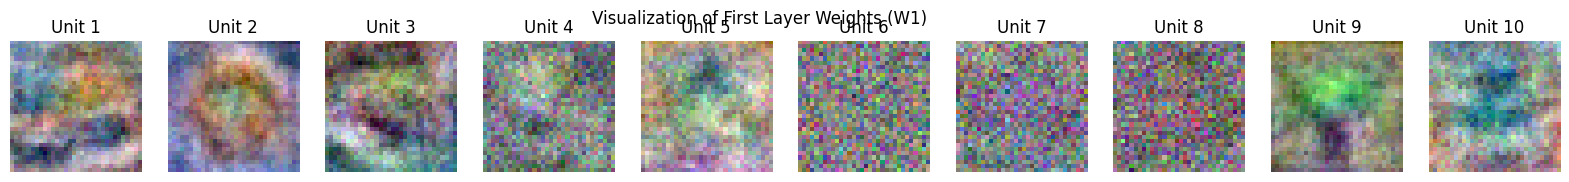

In [4]:
import numpy as np
from data_loader import load_cifar10_data
from model import NeuralNetwork
from trainer import Trainer
import matplotlib.pyplot as plt
hidden_size=512
lr=0.1
reg=0.001
model = NeuralNetwork(3072, hidden_size, 10, activation='relu', reg_lambda=reg)
trainer = Trainer(model, learning_rate=lr, epochs=50)
# 加载最佳模型并可视化 W1
trainer.load_model('best_model.npy')
W1 = trainer.model.W1  # 形状为 (hidden_size, 3072)

# 可视化前 10 个隐藏单元的权重（可根据 hidden_size 调整数量）
num_units = min(10, W1.shape[0])
plt.figure(figsize=(num_units * 2, 2))
for i in range(num_units):
    # 将权重重塑为 32x32x3 的图像
    img = W1[i].reshape(3, 32, 32).transpose(1, 2, 0)
    # 归一化到 [0, 1] 以便显示
    img = (img - img.min()) / (img.max() - img.min())
    plt.subplot(1, num_units, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Unit {i+1}')
plt.suptitle('Visualization of First Layer Weights (W1)')
plt.show()

hidden_size=512 lr=0.1 reg=0.001 在epoch为100，可视化的参数矩阵

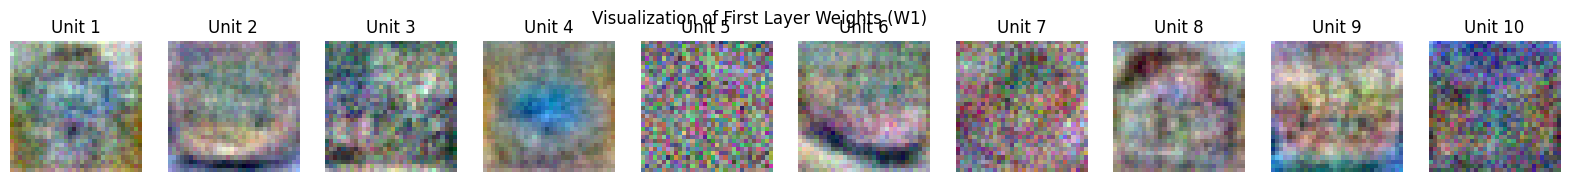

In [6]:
import numpy as np
from data_loader import load_cifar10_data
from model import NeuralNetwork
from trainer import Trainer
import matplotlib.pyplot as plt
hidden_size=512
lr=0.1
reg=0.001
model = NeuralNetwork(3072, hidden_size, 10, activation='relu', reg_lambda=reg)
trainer = Trainer(model, learning_rate=lr, epochs=100)
# 加载最佳模型并可视化 W1
trainer.load_model('best_model.npy')
W1 = trainer.model.W1  # 形状为 (hidden_size, 3072)

# 可视化前 10 个隐藏单元的权重（可根据 hidden_size 调整数量）
num_units = min(10, W1.shape[0])
plt.figure(figsize=(num_units * 2, 2))
for i in range(num_units):
    # 将权重重塑为 32x32x3 的图像
    img = W1[i].reshape(3, 32, 32).transpose(1, 2, 0)
    # 归一化到 [0, 1] 以便显示
    img = (img - img.min()) / (img.max() - img.min())
    plt.subplot(1, num_units, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Unit {i+1}')
plt.suptitle('Visualization of First Layer Weights (W1)')
plt.show()